In [ ]:
# import libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [195]:
# read data
 
df = pd.read_csv("/Downloads/IL_Building_Inventory.csv",
           na_values = {'Year Acquired': 0, 'Year Constructed': 0, 'Square Footage': 0}) 

## 1. Relationship between the year acquired and the year constructed

In [190]:
stats1 = df.groupby("Year Acquired")["Year Constructed"].describe()
plt.rcParams["figure.dpi"] = 200

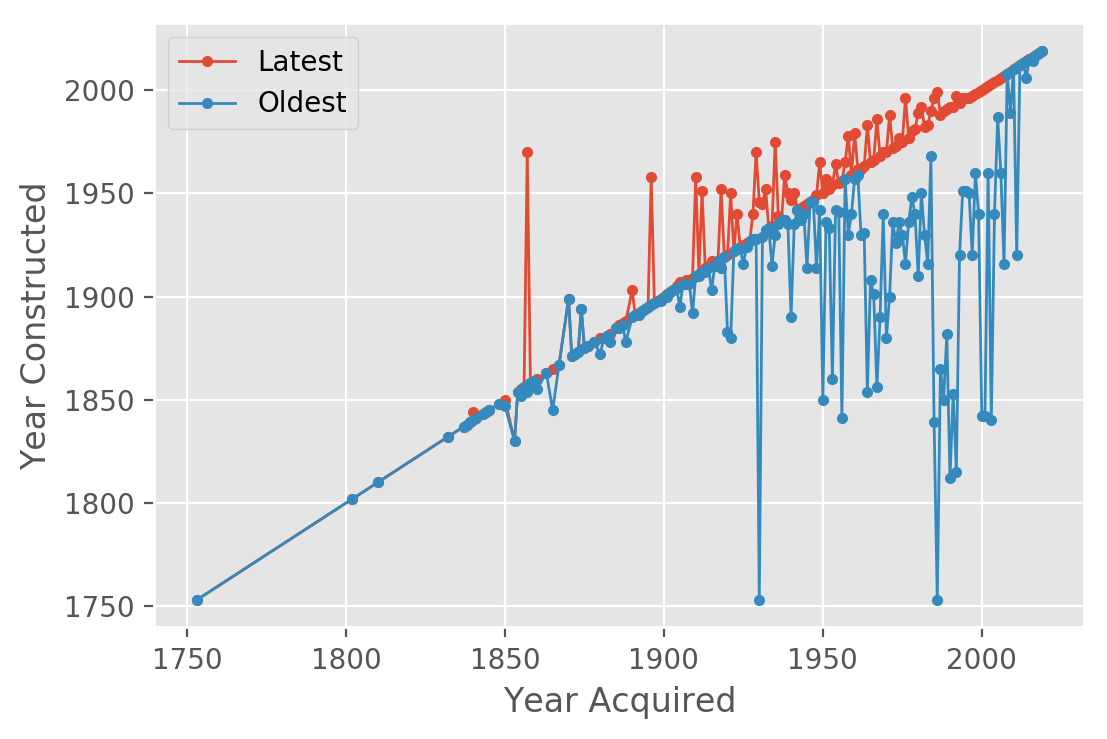

In [191]:
with plt.style.context("ggplot"):
    plt.plot(stats1["max"], marker='.', linewidth = 1.0, label = "Latest")
    plt.plot(stats1["min"], marker='.', linewidth = 1.0, label = "Oldest")
    plt.fill_between(stats1.index, stats1["min"], stats1["max"], color = "#aaaaaa",alpha = 0.02)
    plt.xlabel("Year Acquired")
    plt.ylabel("Year Constructed")
    plt.legend()
    


Successes: 1. it is clear to see the difference between the latest and oldest constructed years for buildings built in certain acquired year. 2. the general relationship of "year constructed" and "year acquired" is captured by this plot.

Shortcomings: 1. there are some overlaps in certain year, which makes the graph look a little messy. 2. we can only roughly tell the year numbers.

## 2. Total square footage as a function of congressional district

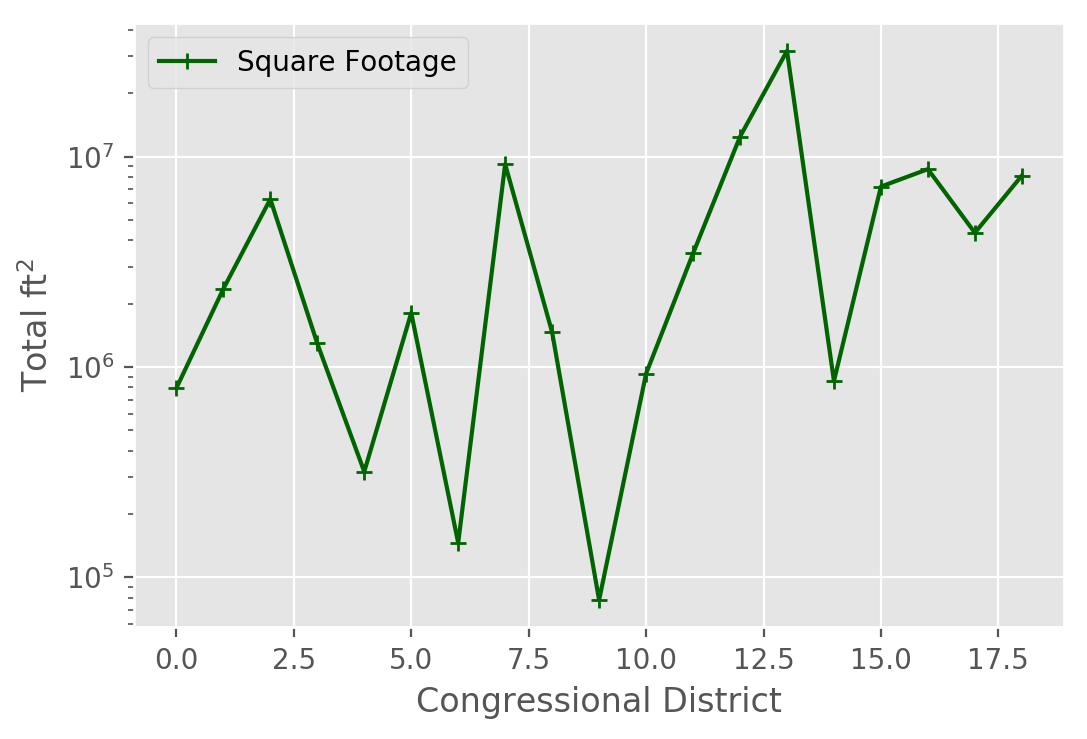

In [189]:
plt.rcParams["figure.dpi"] = 200
with plt.style.context("ggplot"):
    plt.plot(df.groupby("Congress Dist")["Square Footage"].sum(), marker = '+', alpha = 1, color = "darkgreen")
    plt.ylabel(r"Total $\mathrm{ft}^2$")
    plt.xlabel("Congressional District")
    plt.yscale("log")
    plt.legend()

Successes: 1. the general relationship of total square footage and congressional district is captured by this plot.  

Shortcomings: 1. we can only roughly tell the total square footage for different congressional district. 2. some other models may better show the relationship between total square footage and congressional district, e.g. polynomial terms of congressional district can be considered to add in the function.

## 3. Average square footage per floor as a function of congressional district

In [187]:
def divide_two_cols(df_sub):
    return df_sub['Square Footage'].sum() / df_sub['Total Floors'].sum()/1000

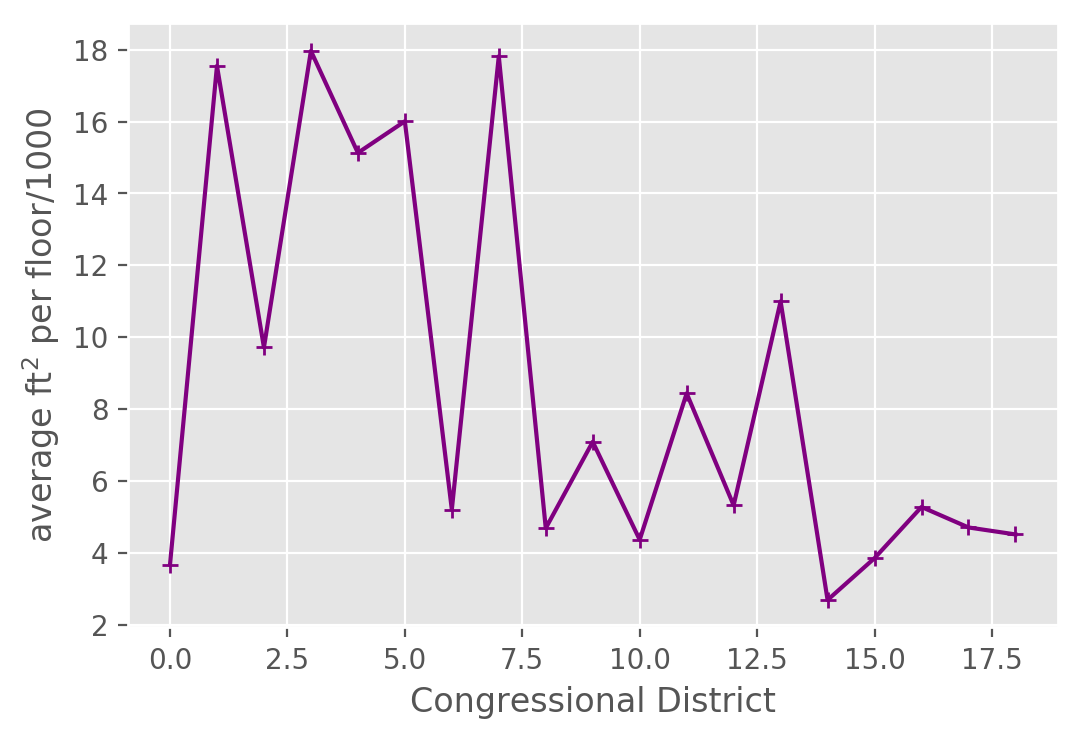

In [197]:
plt.rcParams["figure.dpi"] = 200
with plt.style.context('ggplot'):
    plt.plot(df.groupby("Congress Dist").apply(divide_two_cols), marker = "+", color = "purple")
    plt.ylabel(r"average $\mathrm{ft}^2$ per floor/1000")
    plt.xlabel("Congressional District")

Successes: 1. on y-axis, square footage are divided by 1000, which makes it more readible. 2. the general relationship of "year constructed" and "year acquired" is captured by this plot.

Shortcomings: 1. we can only roughly tell the average square footage per floor for different congressional districts. 2. some other models may better show the relationship between the average square footage and congressional district, e.g. polynomial terms of congressional district can be considered to add in the function.

## 4. Square footage for the five most common departments as a function of year

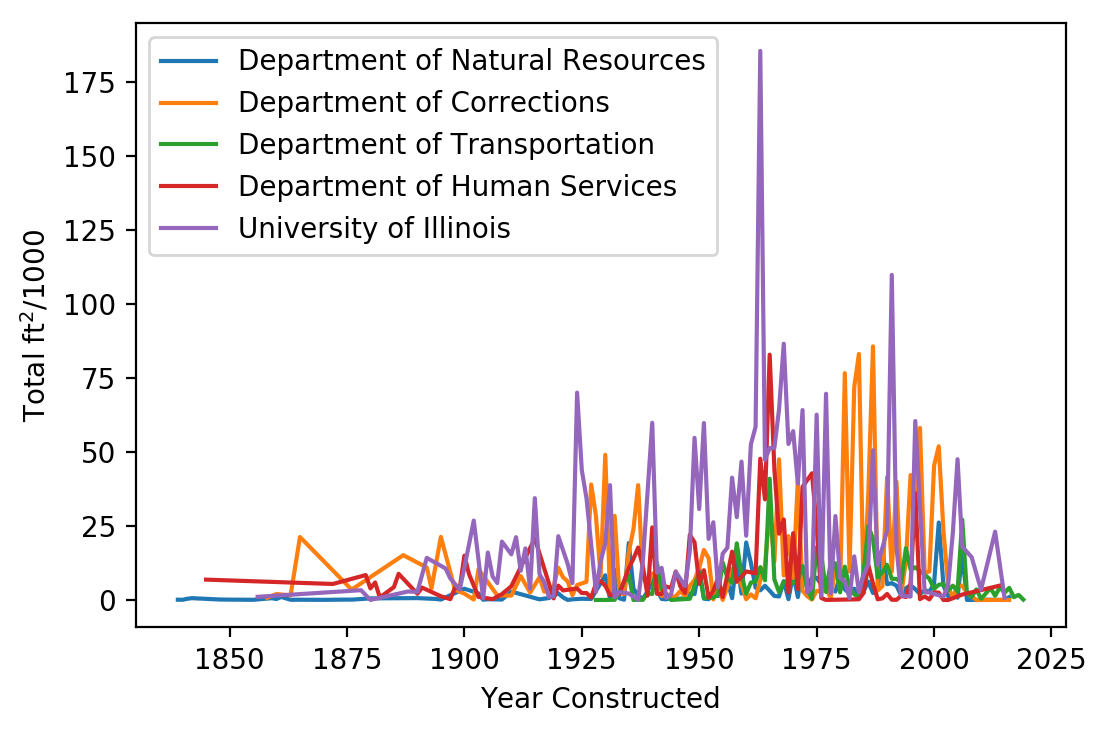

In [186]:
plt.rcParams["figure.dpi"] = 200

Agency = {}
for name, dataset in df.groupby("Agency Name"):
    Agency[name] = dataset.groupby("Year Constructed")["Square Footage"].sum()/10000

most_common = df["Agency Name"].value_counts()[:5].index.values
for name in most_common:
    plt.plot(Agency[name], label = name)
    plt.ylabel(r"Total $\mathrm{ft}^2/1000$")
    plt.xlabel("Year Constructed")
plt.legend()



Successes: 1. The rise or fall of data points and even small changes over time are clearly captured. 2. it easily compares the total square footage for these five departments over time.

Shortcomings: lines overlap on each other so it is sometimes hard to tell the exact squared footage for each department and tell which line is for which department.